In [62]:
###################### 2.1 Loading the MNIST dataset in Keras ###################################

from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

len(train_images)
train_images.shape
# train_images
train_labels.shape

test_images.shape
# test_labels.shape


# my_slice = train_images[:,0:14, 0:14] # select 14 × 14 pixels in the bottom-right corner of all images
my_slice = train_images[:,7:-7, 7:-7] # to crop the images to patches of 14 × 14 pixels centered in the middlle
print(my_slice.shape)


(60000, 14, 14)


In [43]:
###################### 2.2 The network architecture ###############################################

from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [44]:
###################### 2.3 The compilation step ###############################################

network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [45]:
###################### 2.4 Preparing the image data ###############################################

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32')/255 

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32')/255

In [46]:
###################### 2.5 Preparing the labels and train model #####################################

from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

network.fit(train_images, train_labels, epochs=5, batch_size=128)

test_loss, test_acc = network.evaluate(test_images, test_labels)
print("Test Accuaracy: ", test_acc)


Epoch 1/5
60000/60000 [==============================] - 7s 112us/step - loss: 0.2563 - acc: 0.9264
Epoch 2/5
60000/60000 [==============================] - 6s 107us/step - loss: 0.1042 - acc: 0.9695
Epoch 3/5
60000/60000 [==============================] - 7s 112us/step - loss: 0.0699 - acc: 0.9790
Epoch 4/5
60000/60000 [==============================] - 7s 111us/step - loss: 0.0503 - acc: 0.9848
Epoch 5/5
10000/10000 [==============================] - 1s 86us/step
Test Accuaracy:  0.9812


TypeError: Invalid dimensions for image data

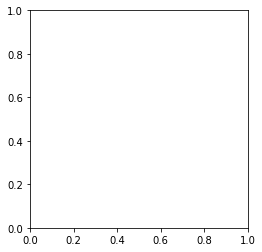

In [51]:
###################### 2.6 Displaying the fourth digit ############################################

digit = train_images[6]

import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [156]:
import numpy as np
 
# x  = np.array([[5, 78, 2, 34, 7],
#                [6, 79, 3, 35, 1],
#                [7, 80, 4, 36, 2]])

# y  = np.array([[5, 78, 2, 34, 4],
#                [6, 79, 3, 35, 1],
#                [7, 80, 4, 36, 2]])



# print(len(y.shape))
# def naive_relu(x):
#     assert len(x.shape)==2    
#     x = x.copy()
#     for i in range(x.shape[0]):
#         for j in range(x.shape[1]):
#             x[i, j] = max(x[i, j], 0)
#     return x
# naive_relu(x)

# def naive_add(x, y):
#     assert len(x.shape)==2
#     assert x.shape == y.shape
    
#     x  = x.copy()
#     for i in range(x.shape[0]):
#         for j in range(y.shape[1]):
#             x[i, j] /= y[i, j]
#     return x

# naive_add(x, y)

########################## the dot product of two vectors #######################################

# x  = np.array([5, 78, 2, 34, 7])
# y = np.array([6, 79, 3, 35, 1])

# def naive_vector_dot(x, y):
#     assert len(x.shape)==1
#     assert len(y.shape)==1
#     assert x.shape[0] == y.shape[0]
    
#     z = 0.
#     for i in range(x.shape[0]):
#         z += x[i] * y[i]
#     return z

# print(naive_vector_dot(x, y))

########################## the dot product of matrices and vector #############################

x  = np.array([[5, 78, 2, 34, 7],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]])
y = np.array([6, 79, 3, 35, 1])

def naive_matrix_vector_dot(x, y):
    assert len(x.shape)==2
    assert len(y.shape)==1
    assert x.shape[1] == y.shape[0]
    
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[i]
    return z

naive_matrix_vector_dot(x, y)

array([ 756., 9796.,  387.])

In [170]:
########################## the dot product of two matrices #############################

import numpy as np

x  = np.array([[5, 78, 2, 34, 7],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]])
# y = np.array([[5, 78, 2],
#               [6, 79, 3],
#               [7, 80, 4],
#               [7, 80, 4],
#               [5, 78, 2]])
y = x.transpose()

# print((y.shape[0]))
def naive_vector_dot(x, y):
    assert len(x.shape)==1
    assert len(y.shape)==1
    assert x.shape[0] == y.shape[0]
    
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

def naive_matrix_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]
    
    z = np.zeros((x.shape[0], y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            rows_x = x[i, :]
            colums_y = y[:, j]
            z[i, j] = naive_vector_dot(rows_x, colums_y)
    return z

# naive_matrix_dot(x, y)

x.shape
print(x.reshape(5, 3))

[[ 5 78  2]
 [34  7  6]
 [79  3 35]
 [ 1  7 80]
 [ 4 36  2]]


In [43]:
###################### 3.1 Loading the IMDB dataset ###############################################

from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

test_data[0]

###################### 3.2 Encoding the integer sequences into a binary matrix ######################

import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    result = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        result[i, sequence] = 1
    return result

x_test = vectorize_sequences(test_data)
x_train = vectorize_sequences(train_data)
# x_test[0]
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

###################### 3.3 The model definition ###############################################

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

###################### 3.4 Compiling the model ###############################################

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

###################### 3.7 Setting aside a validation set ###############################################

#### create a validation set by setting apart 10,000 samples from the original training data

# x_val = x_train[:10000]
# y_val = y_train[:10000]

# partial_x_train = x_train[10000:]
# partial_y_train = y_train[10000:]

###################### 3.8 Training your model ###############################################

# model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

# history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

# history_dict = history.history
# history_dict.keys()

###################### 3.9 Plotting the training and validation loss ###############################################

import matplotlib.pyplot as plt

# history_dict = history.history
# loss_values = history_dict['loss']
# val_loss_values = history_dict['val_loss']
# acc = history_dict['acc']
# epochs = range(1, len(acc)+1)

# plt.plot(epochs, loss_values, 'bo', label='Training Loss')
# plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
# plt.title('Training & Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.show()

##### the training loss decreases with every epoch

# acc_values = history_dict['acc']
# val_acc_values = history_dict['val_acc']



# plt.plot(epochs, acc, 'bo', label='Training Acc')
# plt.plot(epochs, val_acc_values, 'b', label='Validation Acc')
# plt.title('Training & Validation Acc')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.show()

##### the training accuracy increases with every epoch


###################### 3.11 Retraining a model from scratch ###############################################

# model.fit(x_train, y_train, epochs=4, batch_size=512)
# result = model.evaluate(x_test, y_test)
# result ### This approach achieves an accuracy of 88%.

######### Using a trained network to generate predictions on new data 

model.predict(x_test)
### the network is confident for some samples (0.99 or more, or 0.01 or less) but less confident for others (0.6, 0.4).

Epoch 1/4
25000/25000 [==============================] - 4s 164us/step - loss: 0.4484 - acc: 0.8172
Epoch 2/4
25000/25000 [==============================] - 3s 136us/step - loss: 0.2546 - acc: 0.9094
Epoch 3/4
25000/25000 [==============================] - 3s 135us/step - loss: 0.1968 - acc: 0.9297
Epoch 4/4
25000/25000 [==============================] - 4s 143us/step


array([[0.2261905 ],
       [0.99971753],
       [0.82546026],
       ...,
       [0.1927456 ],
       [0.06373461],
       [0.57737345]], dtype=float32)

In [100]:
###################### 3.12 Loading the Reuters dataset ###############################################

from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

# train_data.shape
# train_labels[1]

# test_data[1]
# test_labels[3]

###################### 3.13 Decoding newswires back to text ###############################################

word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]]) ## the indices are offset by 3 
### because 0, 1, and 2 are reserved indices for “padding,” “start of sequence,” and “unknown.”

train_labels[10]

###################### 3.14 Encoding the data #############################################################

import numpy as np

# def vectorize_sequences(sequences, dimension=10000):
#     results = np.zeros((len(sequences), dimension))
#     for i, sequence in enumerate(sequences):
#         results[i, sequence] = 1
#     return results

# x_train = vectorize_sequences(train_data)
# x_test = vectorize_sequences(test_data)

# train_labels

# def to_one_hot(labels, dimension=46):
#     results = np.zeros((len(labels), dimension))
#     for i, label in enumerate(labels):
#         results[i, label] = 1
#     return results

# x_labels = to_one_hot(train_labels)
# y_labels = to_one_hot(test_labels)

###################### 3.15 Model definition #############################################################

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))


###################### 3.16 Compiling the model #############################################################

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

###################### 3.17 Setting aside a validation set ##################################################

x_val = x_train[:1000]
y_val = x_labels[:1000]

partial_x_train = x_train[1000:]
partial_y_train = x_labels[1000:]

###################### 3.18 Training the model ##############################################################

# history  = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

# history.dict = history.history

###################### 3.18 Training the model ##############################################################

import matplotlib.pyplot as plt

# loss = history_dict['loss']
# val_loss = history_dict['val_loss']
# epochs = range(1, len(loss)+1)
# plt.plot(epochs, loss, 'bo', label='Training Loss')
# plt.plot(epochs, val_loss, 'b', label='Validation Loss')
# plt.title('Training & Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# # Plt.legend()
# plt.show()

# acc = history_dict['acc']
# val_acc = history_dict['val_acc']
# epochs = range(1, len(acc)+1)
# plt.plot(epochs, acc, 'bo', label='Training Accuracy')
# plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
# plt.title('Training & Validation Accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# # plt.legend()
# plt.show()

###################### 3.21 Retraining a model from scratch ##############################################

# model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))
# results = model.evaluate(x_test, y_labels)
# results ### Accuracy 78.85%

###################### 3.22 Generating predictions for new data ##########################################

predictions = model.predict(x_test)
predictions[0].shape ### predictions is a vector of length 46
# np.sum(predictions[0]) ### The coefficients in this vector sum to 1:
np.max(predictions[0])
np.argmax(predictions[15]) ### The largest entry is the predicted class i.e. the class with the highest probability


33

In [134]:
###################### 3.24 Loading the Boston housing dataset ##########################################

from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

# train_data[0]
# test_data[0]

# train_targets[0]
# test_targets[0]

###################### 3.25 Normalizing the data #######################################################

### To deal with wildly different range data, It is best practice to do feature wise normalization 
### i.e. for each feature in the input data subtract the mean of the feature anddivide by the standard 
### deviation, so that the feature is centered around 0 and has a unit standard deviation.

mean = train_data.mean(axis=0)
std = train_data.std(axis=0)


train_data -= mean
train_data /= std

### the quantities used for normalizing the test data are computed using the training data

test_data -= mean
test_data /= std

###################### 3.26 Model definition #######################################################

from keras import models
from keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

###################### 3.27 K-fold validation #######################################################

import numpy as np

k = 4
num_val_samples = len((train_data))//k
# num_epochs = 100
# all_score = []

# for i in range(k):
#     print('processing fold#', i)
#     val_data = train_data[i * num_val_samples:(i + 1) * num_val_samples]
#     val_target = train_targets[i * num_val_samples:(i + 1) * num_val_samples]
    
#     partial_train_data = np.concatenate([train_data[:i * num_val_samples],train_data[(i + 1) * num_val_samples:]], axis=0)
#     partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],train_targets[(i + 1) * num_val_samples:]], axis=0)
     
#     model = build_model()
#     model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0)
#     val_mse, val_mae = model.evaluate(val_data, val_target, verbose=0)
#     all_score.append(val_mae)
    
# all_score ### To see individual score of k fold validation
# np.mean(all_score) ### average of all k fold validation scores

###################### 3.28 Saving the validation logs at each fold ##########################################

num_epochs = 100
all_mae_histories = []

# for i in range(k):
#     print('processing fold#', i)
#     val_data = train_data[i * num_val_samples:(i + 1) * num_val_samples]
#     val_target = train_targets[i * num_val_samples:(i + 1) * num_val_samples]
    
#     partial_train_data = np.concatenate([train_data[:i * num_val_samples],train_data[(i + 1) * num_val_samples:]], axis=0)
#     partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],train_targets[(i + 1) * num_val_samples:]], axis=0)
     
#     model = build_model()
#     history = model.fit(partial_train_data, partial_train_targets, validation_data=(val_data, val_target), epochs=num_epochs, batch_size=1, verbose=0)
#     mae_history = history.history['val_mean_absolute_error']
#     all_mae_histories.append(mae_history)
    
# average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]   
# average_mae_history

###################### 3.30 Plotting validation scores ###################################################

import matplotlib.pyplot as plt

# plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
# plt.xlabel('Epochs')
# plt.ylabel('Validation MAE')
# plt.show()


###################### 3.32 Training the final model ###################################################

model = build_model()
model.fit(train_data, train_targets, epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)
test_mae_score #### 2.537

102/102 [==============================] - 1s 6ms/step


2.5378064080780627

In [138]:
99 // 4
range(4)

range(0, 4)